# Introduction to the xgbsurv package - Breslow

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [22]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [23]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

Values are being sorted!
Values are being sorted!


## Load Model

In [60]:
model = XGBSurv(n_estimators=100, objective="breslow_objective",
                                             eval_metric="breslow_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x2974ffce0>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x297519300>), ...)

The options of loss and objective functions can be obtained like below:

In [61]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [62]:
eval_set = [(X_train, y_train)]

In [63]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-breslow_likelihood:6.37333
[1]	validation_0-breslow_likelihood:6.28065
[2]	validation_0-breslow_likelihood:6.19240
[3]	validation_0-breslow_likelihood:6.13472
[4]	validation_0-breslow_likelihood:6.08066
[5]	validation_0-breslow_likelihood:6.05734
[6]	validation_0-breslow_likelihood:6.00029
[7]	validation_0-breslow_likelihood:5.95976
[8]	validation_0-breslow_likelihood:5.93380
[9]	validation_0-breslow_likelihood:5.91447
[10]	validation_0-breslow_likelihood:5.89635
[11]	validation_0-breslow_likelihood:5.88649
[12]	validation_0-breslow_likelihood:5.86888
[13]	validation_0-breslow_likelihood:5.83333
[14]	validation_0-breslow_likelihood:5.80339
[15]	validation_0-breslow_likelihood:5.78721
[16]	validation_0-breslow_likelihood:5.77726
[17]	validation_0-breslow_likelihood:5.77185
[18]	validation_0-breslow_likelihood:5.73977
[19]	validation_0-breslow_likelihood:5.70202
[20]	validation_0-breslow_likelihood:5.68568
[21]	validation_0-breslow_likelihood:5.67442
[22]	validation_0-br

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x2974ffce0>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x297519300>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [64]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [65]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [66]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
299.399994,0.783262,8.433967,39.639253,424.688113,34.067807,4.128186,14.506498,25.355337,37.249669,18.398964,...,2.936324,31.845438,7.401373,6.610906,75.181144,4.817302,6.355900,2.195146,7.860963,28.259287
307.933319,0.899393,9.684437,45.516403,487.654874,39.118901,4.740255,16.657316,29.114669,42.772525,21.126903,...,3.371681,36.567030,8.498745,7.591078,86.327944,5.531543,7.298264,2.520611,9.026475,32.449175
330.366669,0.899393,9.684437,45.516403,487.654874,39.118901,4.740255,16.657316,29.114669,42.772525,21.126903,...,3.371681,36.567030,8.498745,7.591078,86.327944,5.531543,7.298264,2.520611,9.026475,32.449175


## Predict Survival Function

In [67]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
299.399994,0.456913,0.000217,6.093840e-18,3.633257e-185,1.601545e-15,0.016112,5.010813e-07,9.734576e-12,6.647741e-17,1.021954e-08,...,0.053060,1.478094e-14,0.000610,0.001346,2.234827e-33,0.008089,0.001736,0.111342,0.000386,5.335164e-13
307.933319,0.406817,0.000062,1.707959e-20,1.637491e-212,1.025362e-17,0.008736,5.832026e-08,2.268089e-13,2.655391e-19,6.678862e-10,...,0.034332,1.315651e-16,0.000204,0.000505,3.222927e-38,0.003960,0.000677,0.080410,0.000120,8.081693e-15
330.366669,0.406817,0.000062,1.707959e-20,1.637491e-212,1.025362e-17,0.008736,5.832026e-08,2.268089e-13,2.655391e-19,6.678862e-10,...,0.034332,1.315651e-16,0.000204,0.000505,3.222927e-38,0.003960,0.000677,0.080410,0.000120,8.081693e-15


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard Breslow')

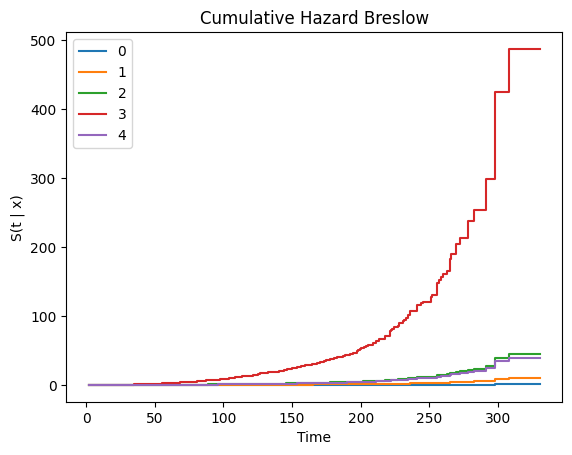

In [68]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard Breslow")

Text(0.5, 1.0, 'Survival Curve Breslow')

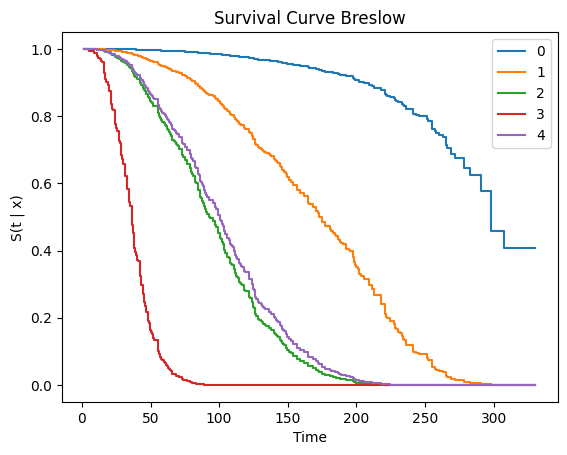

In [69]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Breslow")

## Evaluate

### Test

In [70]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.6052811144155626


In [71]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.21303154724014361
